In [49]:
from sklearn.datasets import load_boston
boston =load_boston()
x = boston.data
y=boston.target
col_names = boston.feature_names

In [50]:
import pandas as pd
import numpy as np

In [51]:
bhp = pd.DataFrame(boston.data, columns= col_names)

# 데이터 프레임에 새로운 컬럼  MEDV 추가 컬럼값은 y 사용(주택가격)

In [52]:
bhp['MEDV'] = y

In [53]:
bhp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# train test = 8.5 :1.5
    CHAS를 활용한stratify
    
    randmstate seed2021

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify = bhp['CHAS'], random_state=2021)

train valid 7: 1.5
    CHAS 활용한 stratify
    
    randomstate 2021

In [55]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=3/14, stratify = bhp['CHAS'], random_state=2021)

In [56]:
pd.DataFrame(x_valid)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
1,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
2,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24.0,666.0,20.2,43.06,23.98
3,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58
4,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98
105,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
106,0.03502,80.0,4.95,0.0,0.411,6.861,27.9,5.1167,4.0,245.0,19.2,396.90,3.33
107,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70


nox rm 컬럼 민맥스 스켕일링
트레이닝 셋 이용 
트레이닝 밸리 테스트 전부 스케일링

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(bhp[['NOX']])
nox = scaler.transform(bhp[['NOX']])
nox1 = pd.DataFrame(nox, columns=['NOX'])

scaler.fit(bhp[['RM']])
rm = scaler.transform(bhp[['RM']])
rm1 = pd.DataFrame(rm, columns=['RM'])

bhp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


데이터 RAD B는 표준화 스케일링 트레이닝 셋 활용해서 트레이닝 밸리 테스트 전부 스케일링

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(bhp[['RAD']])
rad = scaler.transform(bhp[['RAD']])
rad1 = pd.DataFrame(rad, columns=['RAD'])
rad1
 
scaler.fit(bhp[['B']])
b = scaler.transform(bhp[['B']])
b1 = pd.DataFrame(b, columns=['B'])

bhp


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


트레이닝 셋을 이용해 선형회귀모델의 normal equation으로 coef 추정, lr 저장

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.coef_

array([-1.07285469e-01,  5.75274591e-02,  3.14352130e-02,  2.79428436e+00,
       -1.93108840e+01,  3.74783954e+00, -1.95597877e-03, -1.69375865e+00,
        3.55031259e-01, -1.38096633e-02, -9.18197448e-01,  1.01474084e-02,
       -5.62540633e-01])

regularization term 의 penalty intensity는 5로 설정한다

In [61]:
from sklearn.linear_model import Ridge
ridge =Ridge(alpha = 5)
ridge.fit(x_train, y_train)
ridge.coef_

array([-0.09897373,  0.05972486, -0.03516517,  2.03645208, -3.72398864,
        3.7068166 , -0.01366585, -1.45956398,  0.33258459, -0.0159613 ,
       -0.7662343 ,  0.01057655, -0.58904078])

페널티 인텐시티 1

In [62]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)
lasso.coef_

array([-0.06532842,  0.05779456, -0.        ,  0.        , -0.        ,
        1.01312353,  0.01837977, -0.84343152,  0.32939515, -0.01802046,
       -0.69441472,  0.00913147, -0.78879269])

엘라스틱 트레이닝 셋으로 l2 페널티는 0.5 l2페널티는 3 학습모델은 elastic 로 저장

In [63]:
from sklearn.linear_model import ElasticNet
#alpha : a + b를 의미. 여기서 a란, L1으로 얼마나 정규화시킬지의 값, b란, L2로 얼마나 정규화시킬지의 값을 의미
#l1_ratio : "L1의 정규화값 / (L1의 정규화값 + L2의 정규화값)"을 의미. 만약 0.8이라면 8/10 이기 때문에 L1은 8만큼, L2는 2만큼 정규화시킴을 의미
elasticnet = ElasticNet(alpha=3.5, l1_ratio=0.8571, random_state=2021)
elasticnet.fit(x_train, y_train)

ElasticNet(alpha=3.5, l1_ratio=0.8571, random_state=2021)

벨리데이션 셋을 이용해 네모델의 성능 출력 손실함수는 rmse

In [81]:
from sklearn.metrics import mean_squared_error
y_valid_pred1=lr.predict(x_valid)
#y_train_pred=lr.predict(x_train)

valid_rmse_lr=np.sqrt(mean_squared_error(y_valid, y_valid_pred1)) #훈련 데이터의 평가 점수
print("lr Valid RMSE:%.4f" % valid_rmse_lr)

#test_rmse=np.sqrt(mean_squared_error(y_test, y_test_pred))
#print("lr Test RMSE:%.4f" % test_rmse)

y_valid_pred2=ridge.predict(x_valid)
valid_rmse_ridge=np.sqrt(mean_squared_error(y_valid, y_valid_pred2)) #훈련 데이터의 평가 점수
print("ridge Valid RMSE:%.4f" % valid_rmse_ridge)

y_valid_pred3=lasso.predict(x_valid)
valid_rmse_lasso=np.sqrt(mean_squared_error(y_valid, y_valid_pred3)) #훈련 데이터의 평가 점수
print("lasso Valid RMSE:%.4f" % valid_rmse_lasso)

y_valid_pred4=elasticnet.predict(x_valid)
valid_rmse_elastic=np.sqrt(mean_squared_error(y_valid, y_valid_pred4)) #훈련 데이터의 평가 점수
print("elastic net Valid RMSE:%.4f" % valid_rmse_elastic)

lr Valid RMSE:4.1256
ridge Valid RMSE:4.1344
lasso Valid RMSE:4.3824
elastic net Valid RMSE:4.8375


테스트 셋을 이용해 네모델의 성능 출력 손실함수는 mae

In [84]:
from sklearn.metrics import mean_absolute_error

y_test_pred1=lr.predict(x_test)
test_mae_lr=mean_absolute_error(y_test, y_test_pred1) #훈련 데이터의 평가 점수
print("lr Test MAE:%.4f" % test_mae_lr)

y_test_pred2=ridge.predict(x_test)
test_mae_ridge=mean_absolute_error(y_test, y_test_pred2) #훈련 데이터의 평가 점수
print("ridge Test MAE:%.4f" % test_mae_ridge)

y_test_pred3=lasso.predict(x_test)
test_mae_lasso=mean_absolute_error(y_test, y_test_pred3) #훈련 데이터의 평가 점수
print("lasso Test MAE:%.4f" % test_mae_lasso)

y_test_pred4=elasticnet.predict(x_test)
test_mae_elastic=mean_absolute_error(y_test, y_test_pred4) #훈련 데이터의 평가 점수
print("elasticNet Test MAE:%.4f" % test_mae_elastic)

lr Test MAE:3.3569
ridge Test MAE:3.2999
lasso Test MAE:3.5112
elasticNet Test MAE:3.9533


테스트 셋에서 CHAS 가 1일떄, 학습된 네모델의 성능을 출력하시오 손실함수 MAE

In [136]:
for i in range(len(x_test)):
    x_test[i][3] = 1

In [137]:
from sklearn.metrics import mean_absolute_error

y_test_pred1=lr.predict(x_test)
test_mae_lr=mean_absolute_error(y_test, y_test_pred1) #훈련 데이터의 평가 점수
print("lr Test MAE:%.4f" % test_mae_lr)

y_test_pred2=ridge.predict(x_test)
test_mae_ridge=mean_absolute_error(y_test, y_test_pred2) #훈련 데이터의 평가 점수
print("ridge Test MAE:%.4f" % test_mae_ridge)

y_test_pred3=lasso.predict(x_test)
test_mae_lasso=mean_absolute_error(y_test, y_test_pred3) #훈련 데이터의 평가 점수
print("lasso Test MAE:%.4f" % test_mae_lasso)

y_test_pred4=elasticnet.predict(x_test)
test_mae_elastic=mean_absolute_error(y_test, y_test_pred4) #훈련 데이터의 평가 점수
print("elasticNet Test MAE:%.4f" % test_mae_elastic)

lr Test MAE:4.4820
ridge Test MAE:4.1692
lasso Test MAE:3.5112
elasticNet Test MAE:3.9533


## 뉴럴네트워크 모델학습  텐서플로활용
2개이상의 풀리 커넥티드 레이어
FC layer뒤에는 batch normalization진행
ModelCheckpoint 콜백으로 validation performance 가 좋은 모델을 best_model.h5 파일로 저장
학습과정의 로그를 history로 선언하여 남긴다
epochs =200

In [163]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

from keras.optimizer_v2.adam import Adam
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mse'])


modelpath = "best_model.h5"
checkpointer = ModelCheckpoint( filepath=modelpath, monitor='val_loss', verbose=1,
                               save_best_only=True)

history = model.fit(x_valid, y_valid, epochs=200, validation_split=0.2, callbacks=checkpointer)



Epoch 1/200
3/3 [==============================] - 2s 194ms/step - loss: 367.7992 - mse: 367.7992 - val_loss: 432.0046 - val_mse: 432.0046

Epoch 00001: val_loss improved from inf to 432.00461, saving model to best_model.h5
Epoch 2/200
3/3 [==============================] - 0s 9ms/step - loss: 196.1854 - mse: 196.1854 - val_loss: 162.2363 - val_mse: 162.2363

Epoch 00002: val_loss improved from 432.00461 to 162.23631, saving model to best_model.h5
Epoch 3/200
3/3 [==============================] - 0s 10ms/step - loss: 74.6797 - mse: 74.6797 - val_loss: 146.2715 - val_mse: 146.2715

Epoch 00003: val_loss improved from 162.23631 to 146.27155, saving model to best_model.h5
Epoch 4/200
3/3 [==============================] - 0s 11ms/step - loss: 80.3362 - mse: 80.3362 - val_loss: 186.3073 - val_mse: 186.3073

Epoch 00004: val_loss did not improve from 146.27155
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 90.5740 - mse: 90.5740 - val_loss: 129.5419 - val_mse: 129.5

3/3 [==============================] - 0s 9ms/step - loss: 18.8340 - mse: 18.8340 - val_loss: 110.7487 - val_mse: 110.7487

Epoch 00041: val_loss did not improve from 105.22464
Epoch 42/200
3/3 [==============================] - 0s 9ms/step - loss: 18.2791 - mse: 18.2791 - val_loss: 103.3836 - val_mse: 103.3836

Epoch 00042: val_loss improved from 105.22464 to 103.38355, saving model to best_model.h5
Epoch 43/200
3/3 [==============================] - 0s 8ms/step - loss: 17.4233 - mse: 17.4233 - val_loss: 111.2431 - val_mse: 111.2431

Epoch 00043: val_loss did not improve from 103.38355
Epoch 44/200
3/3 [==============================] - 0s 9ms/step - loss: 19.6016 - mse: 19.6016 - val_loss: 103.0642 - val_mse: 103.0642

Epoch 00044: val_loss improved from 103.38355 to 103.06421, saving model to best_model.h5
Epoch 45/200
3/3 [==============================] - 0s 9ms/step - loss: 18.7096 - mse: 18.7096 - val_loss: 107.2306 - val_mse: 107.2306

Epoch 00045: val_loss did not improve from


Epoch 00081: val_loss did not improve from 90.90201
Epoch 82/200
3/3 [==============================] - 0s 9ms/step - loss: 14.2166 - mse: 14.2166 - val_loss: 90.7933 - val_mse: 90.7933

Epoch 00082: val_loss improved from 90.90201 to 90.79330, saving model to best_model.h5
Epoch 83/200
3/3 [==============================] - 0s 9ms/step - loss: 14.8142 - mse: 14.8142 - val_loss: 93.0038 - val_mse: 93.0038

Epoch 00083: val_loss did not improve from 90.79330
Epoch 84/200
3/3 [==============================] - 0s 9ms/step - loss: 17.4893 - mse: 17.4893 - val_loss: 89.5406 - val_mse: 89.5406

Epoch 00084: val_loss improved from 90.79330 to 89.54058, saving model to best_model.h5
Epoch 85/200
3/3 [==============================] - 0s 9ms/step - loss: 20.3183 - mse: 20.3183 - val_loss: 90.6387 - val_mse: 90.6387

Epoch 00085: val_loss did not improve from 89.54058
Epoch 86/200
3/3 [==============================] - 0s 9ms/step - loss: 14.9083 - mse: 14.9083 - val_loss: 95.1219 - val_mse: 9

3/3 [==============================] - 0s 9ms/step - loss: 10.8029 - mse: 10.8029 - val_loss: 81.4296 - val_mse: 81.4296

Epoch 00123: val_loss did not improve from 81.26362
Epoch 124/200
3/3 [==============================] - 0s 9ms/step - loss: 10.9278 - mse: 10.9278 - val_loss: 82.0734 - val_mse: 82.0734

Epoch 00124: val_loss did not improve from 81.26362
Epoch 125/200
3/3 [==============================] - 0s 9ms/step - loss: 9.7707 - mse: 9.7707 - val_loss: 81.1277 - val_mse: 81.1277

Epoch 00125: val_loss improved from 81.26362 to 81.12774, saving model to best_model.h5
Epoch 126/200
3/3 [==============================] - 0s 9ms/step - loss: 11.4507 - mse: 11.4507 - val_loss: 80.4448 - val_mse: 80.4448

Epoch 00126: val_loss improved from 81.12774 to 80.44482, saving model to best_model.h5
Epoch 127/200
3/3 [==============================] - 0s 9ms/step - loss: 11.2310 - mse: 11.2310 - val_loss: 82.3006 - val_mse: 82.3006

Epoch 00127: val_loss did not improve from 80.44482
Epoc


Epoch 00164: val_loss did not improve from 73.57563
Epoch 165/200
3/3 [==============================] - 0s 9ms/step - loss: 9.7808 - mse: 9.7808 - val_loss: 75.4634 - val_mse: 75.4634

Epoch 00165: val_loss did not improve from 73.57563
Epoch 166/200
3/3 [==============================] - 0s 9ms/step - loss: 10.0006 - mse: 10.0006 - val_loss: 74.9844 - val_mse: 74.9844

Epoch 00166: val_loss did not improve from 73.57563
Epoch 167/200
3/3 [==============================] - 0s 11ms/step - loss: 8.6859 - mse: 8.6859 - val_loss: 77.2345 - val_mse: 77.2345

Epoch 00167: val_loss did not improve from 73.57563
Epoch 168/200
3/3 [==============================] - 0s 9ms/step - loss: 9.1048 - mse: 9.1048 - val_loss: 76.5270 - val_mse: 76.5270

Epoch 00168: val_loss did not improve from 73.57563
Epoch 169/200
3/3 [==============================] - 0s 9ms/step - loss: 10.6590 - mse: 10.6590 - val_loss: 74.8746 - val_mse: 74.8746

Epoch 00169: val_loss did not improve from 73.57563
Epoch 170/20

# 뉴럴 네트워크의 학습로그를 시각화 하시오

epochs에 따른 loss변화를 시각화 한다
train loss와 validation loss를 전부 시각화 하고 , 구별 가능해야한다
그래프타이틀은 Loss
x축은 epochs y축은 MSE로 표시 

In [165]:
import matplotlib.pyplot as plt

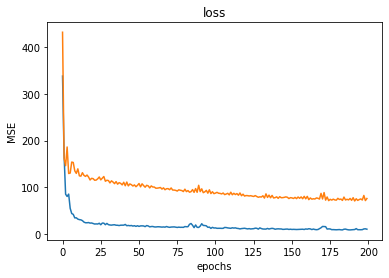

In [173]:
h = history
plt.plot(h.history['mse'])
plt.plot(h.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel("MSE")
plt.show()
